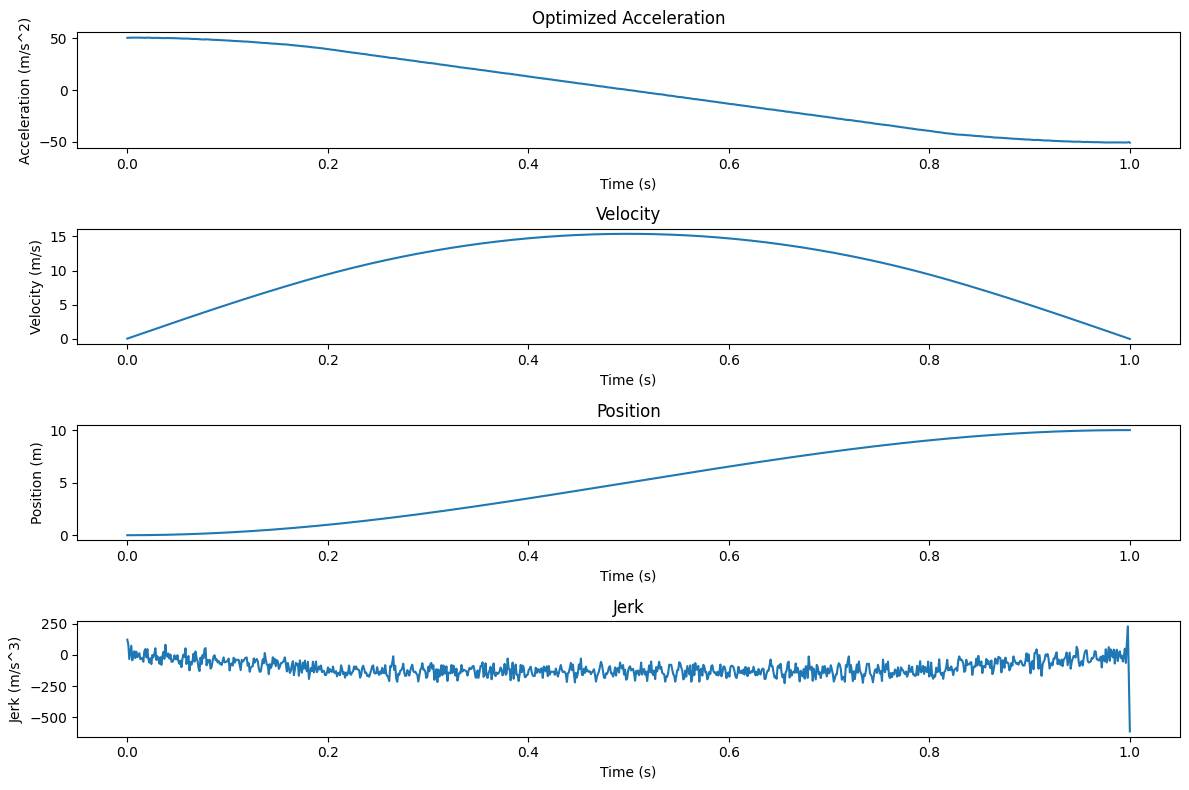

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the number of time steps and total time
num_steps = 1000
total_time = 1.0  # You may need to adjust this based on the problem's requirements
time = np.linspace(0, total_time, num_steps)

# Initial and final conditions
D = 10.0  # Target displacement
initial_position = 0.0
final_position = D
initial_velocity = 0.0
final_velocity = 0.0
initial_acceleration = 0.0
final_acceleration = 0.0

# Function to calculate velocity and position from acceleration
def integrate_acceleration(acceleration, dt):
    velocity = np.cumsum(acceleration) * dt
    position = np.cumsum(velocity) * dt
    return velocity, position

# Function to calculate jerk from acceleration
def calculate_jerk(acceleration, dt):
    jerk = np.gradient(acceleration, dt)
    return jerk

# Objective function to minimize jerk and achieve target position
def objective(acceleration, dt):
    velocity, position = integrate_acceleration(acceleration, dt)
    jerk = calculate_jerk(acceleration, dt)
    jerk_cost = np.sum(jerk**2)  # Minimize the squared jerk
    position_error = (position[-1] - D)**2  # Ensure final position is D
    velocity_error = velocity[-1]**2  # Ensure final velocity is 0
    return jerk_cost + 1e6 * position_error + 1e6 * velocity_error

# Initial guess for the acceleration profile
initial_guess = np.zeros(num_steps)

# Optimization constraints
constraints = [
    {'type': 'eq', 'fun': lambda a: integrate_acceleration(a, time[1] - time[0])[1][-1] - D},  # Final position constraint
    {'type': 'eq', 'fun': lambda a: integrate_acceleration(a, time[1] - time[0])[0][-1]},     # Final velocity constraint
]

# Perform the optimization
result = minimize(objective, initial_guess, args=(time[1] - time[0]), constraints=constraints, method='SLSQP')

# Extract the optimized acceleration profile
optimized_acceleration = result.x
optimized_velocity, optimized_position = integrate_acceleration(optimized_acceleration, time[1] - time[0])
optimized_jerk = calculate_jerk(optimized_acceleration, time[1] - time[0])

# Plotting the results
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(time, optimized_acceleration)
plt.title('Optimized Acceleration')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')

plt.subplot(4, 1, 2)
plt.plot(time, optimized_velocity)
plt.title('Velocity')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')

plt.subplot(4, 1, 3)
plt.plot(time, optimized_position)
plt.title('Position')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

plt.subplot(4, 1, 4)
plt.plot(time, optimized_jerk)
plt.title('Jerk')
plt.xlabel('Time (s)')
plt.ylabel('Jerk (m/s^3)')

plt.tight_layout()
plt.show()
